In [5]:
## Python 3.11.7

# generative model
from src.SlovotvirModel import run_model_parallel

# bayesflow components
import bayesflow.diagnostics as diag

# helpher functions
from src.helpers import (generate_latex_table,
                         binning,
                         train_and_amortize)

# other
import pickle
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.decomposition import PCA
import umap

sns.set(context='paper', 
        style='ticks', 
        font_scale=1,
        # add removing the right and top spines
        rc={'axes.spines.right': False, 
            'axes.spines.top': False,})

sns.set_palette('colorblind')

<!-- ## Inference of all 3 parameters -->

In [6]:
train_data = pickle.load(open("data/train_data_final.pkl", "rb"))
test_data = pickle.load(open("data/test_data_final.pkl", "rb"))
valid_data = pickle.load(open("data/valid_data_final.pkl", "rb"))

In [7]:
prior_means = np.mean(train_data["prior_draws"], axis=0)
prior_stds = np.std(train_data["prior_draws"], axis=0)

<!-- ### 2. Training the model -->

In [8]:
num_params = 3
epochs = 200
batch_size = 32
learning_rate = 0.0005

In [9]:
history, trainer, amortizer = train_and_amortize(train_data, 
                                                 batch_size, 
                                                 test_data, 
                                                 epochs, 
                                                 num_params, 
                                                 4, 
                                                 learning_rate, 
                                                 prior_means, 
                                                 prior_stds)

INFO:root:Trainer initialization: No generative model provided. Only offline learning mode is available!


Training epoch 1:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 1, Loss: 1.561


Training epoch 2:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 2, Loss: 1.189


Training epoch 3:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 3, Loss: 0.984


Training epoch 4:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 4, Loss: 0.800


Training epoch 5:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 5, Loss: 0.512


Training epoch 6:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 6, Loss: 0.571


Training epoch 7:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 7, Loss: 0.486


Training epoch 8:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 8, Loss: -0.045


Training epoch 9:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 9, Loss: 0.210


Training epoch 10:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 10, Loss: -0.496


Training epoch 11:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 11, Loss: 0.271


Training epoch 12:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 12, Loss: -0.260


Training epoch 13:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 13, Loss: -0.244


Training epoch 14:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 14, Loss: 0.292


Training epoch 15:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 15, Loss: -0.313


Training epoch 16:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 16, Loss: -1.076


Training epoch 17:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 17, Loss: 0.159


Training epoch 18:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 18, Loss: -0.544


Training epoch 19:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 19, Loss: -0.266


Training epoch 20:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 20, Loss: -0.266


Training epoch 21:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 21, Loss: -1.264


Training epoch 22:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 22, Loss: -0.648


Training epoch 23:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 23, Loss: -0.800


Training epoch 24:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 24, Loss: -1.168


Training epoch 25:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 25, Loss: -0.900


Training epoch 26:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 26, Loss: -1.275


Training epoch 27:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 27, Loss: 0.087


Training epoch 28:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 28, Loss: -1.538


Training epoch 29:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 29, Loss: -0.604


Training epoch 30:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 30, Loss: 0.001


Training epoch 31:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 31, Loss: -0.449


Training epoch 32:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 32, Loss: -1.206


Training epoch 33:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 33, Loss: -0.246


Training epoch 34:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 34, Loss: -1.237


Training epoch 35:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 35, Loss: -0.865


Training epoch 36:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 36, Loss: -1.480


Training epoch 37:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 37, Loss: -0.885


Training epoch 38:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 38, Loss: 0.477


Training epoch 39:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 39, Loss: -1.165


Training epoch 40:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 40, Loss: -1.427


Training epoch 41:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 41, Loss: -1.511


Training epoch 42:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 42, Loss: -1.091


Training epoch 43:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 43, Loss: -0.231


Training epoch 44:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 44, Loss: -0.382


Training epoch 45:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 45, Loss: -1.810


Training epoch 46:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 46, Loss: -1.143


Training epoch 47:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 47, Loss: -0.341


Training epoch 48:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 48, Loss: -0.868


Training epoch 49:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 49, Loss: -0.999


Training epoch 50:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 50, Loss: -1.685


Training epoch 51:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 51, Loss: -1.767


Training epoch 52:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 52, Loss: -1.701


Training epoch 53:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 53, Loss: -1.836


Training epoch 54:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 54, Loss: -0.975


Training epoch 55:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 55, Loss: -1.071


Training epoch 56:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 56, Loss: -1.891


Training epoch 57:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 57, Loss: -1.882


Training epoch 58:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 58, Loss: -2.132


Training epoch 59:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 59, Loss: -1.684


Training epoch 60:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 60, Loss: -0.855


Training epoch 61:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 61, Loss: -1.252


Training epoch 62:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 62, Loss: -1.328


Training epoch 63:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 63, Loss: -1.608


Training epoch 64:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 64, Loss: -0.421


Training epoch 65:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 65, Loss: -1.091


Training epoch 66:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 66, Loss: -1.735


Training epoch 67:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 67, Loss: -1.950


Training epoch 68:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 68, Loss: -1.881


Training epoch 69:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 69, Loss: -1.637


Training epoch 70:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 70, Loss: -1.427


Training epoch 71:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 71, Loss: -2.201


Training epoch 72:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 72, Loss: -1.157


Training epoch 73:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 73, Loss: -1.386


Training epoch 74:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 74, Loss: -1.694


Training epoch 75:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 75, Loss: -0.703


Training epoch 76:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 76, Loss: -1.773


Training epoch 77:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 77, Loss: -1.643


Training epoch 78:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 78, Loss: -1.619


Training epoch 79:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 79, Loss: -2.197


Training epoch 80:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 80, Loss: -1.873


Training epoch 81:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 81, Loss: -1.936


Training epoch 82:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 82, Loss: -1.424


Training epoch 83:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 83, Loss: -0.720


Training epoch 84:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 84, Loss: -2.266


Training epoch 85:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 85, Loss: -1.937


Training epoch 86:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 86, Loss: -1.765


Training epoch 87:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 87, Loss: -2.191


Training epoch 88:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 88, Loss: -2.323


Training epoch 89:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 89, Loss: -1.314


Training epoch 90:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 90, Loss: -2.476


Training epoch 91:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 91, Loss: -2.260


Training epoch 92:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 92, Loss: -2.295


Training epoch 93:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 93, Loss: -2.632


Training epoch 94:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 94, Loss: -2.597


Training epoch 95:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 95, Loss: -2.543


Training epoch 96:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 96, Loss: -1.189


Training epoch 97:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 97, Loss: -2.246


Training epoch 98:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 98, Loss: -2.314


Training epoch 99:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 99, Loss: -2.617


Training epoch 100:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 100, Loss: -2.691


Training epoch 101:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 101, Loss: -2.656


Training epoch 102:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 102, Loss: -1.840


Training epoch 103:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 103, Loss: -2.476


Training epoch 104:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 104, Loss: -1.881


Training epoch 105:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 105, Loss: -2.446


Training epoch 106:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 106, Loss: -2.216


Training epoch 107:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 107, Loss: -2.577


Training epoch 108:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 108, Loss: -1.887


Training epoch 109:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 109, Loss: -2.380


Training epoch 110:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 110, Loss: -2.750


Training epoch 111:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 111, Loss: -2.358


Training epoch 112:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 112, Loss: -2.247


Training epoch 113:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 113, Loss: -2.700


Training epoch 114:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 114, Loss: -2.025


Training epoch 115:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 115, Loss: -2.675


Training epoch 116:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 116, Loss: -1.935


Training epoch 117:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 117, Loss: -2.761


Training epoch 118:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 118, Loss: -2.208


Training epoch 119:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 119, Loss: -2.870


Training epoch 120:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 120, Loss: -2.371


Training epoch 121:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 121, Loss: -2.200


Training epoch 122:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 122, Loss: -2.888


Training epoch 123:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 123, Loss: -2.184


Training epoch 124:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 124, Loss: -2.551


Training epoch 125:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 125, Loss: -2.716


Training epoch 126:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 126, Loss: -2.719


Training epoch 127:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 127, Loss: -2.012


Training epoch 128:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 128, Loss: -2.147


Training epoch 129:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 129, Loss: -2.322


Training epoch 130:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 130, Loss: -2.878


Training epoch 131:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 131, Loss: -2.162


Training epoch 132:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 132, Loss: -2.761


Training epoch 133:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 133, Loss: -2.029


Training epoch 134:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 134, Loss: -2.829


Training epoch 135:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 135, Loss: -2.853


Training epoch 136:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 136, Loss: -2.956


Training epoch 137:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 137, Loss: -2.782


Training epoch 138:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 138, Loss: -2.966


Training epoch 139:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 139, Loss: -2.990


Training epoch 140:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 140, Loss: -2.698


Training epoch 141:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 141, Loss: -2.972


Training epoch 142:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 142, Loss: -2.962


Training epoch 143:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 143, Loss: -2.937


Training epoch 144:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 144, Loss: -2.764


Training epoch 145:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 145, Loss: -2.753


Training epoch 146:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 146, Loss: -2.989


Training epoch 147:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 147, Loss: -3.043


Training epoch 148:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 148, Loss: -2.967


Training epoch 149:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 149, Loss: -2.860


Training epoch 150:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 150, Loss: -3.049


Training epoch 151:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 151, Loss: -3.053


Training epoch 152:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 152, Loss: -3.000


Training epoch 153:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 153, Loss: -3.078


Training epoch 154:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 154, Loss: -3.038


Training epoch 155:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 155, Loss: -2.716


Training epoch 156:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 156, Loss: -3.114


Training epoch 157:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 157, Loss: -3.054


Training epoch 158:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 158, Loss: -3.164


Training epoch 159:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 159, Loss: -2.779


Training epoch 160:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 160, Loss: -3.056


Training epoch 161:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 161, Loss: -3.101


Training epoch 162:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 162, Loss: -3.131


Training epoch 163:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 163, Loss: -3.105


Training epoch 164:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 164, Loss: -3.110


Training epoch 165:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 165, Loss: -3.145


Training epoch 166:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 166, Loss: -3.108


Training epoch 167:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 167, Loss: -3.177


Training epoch 168:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 168, Loss: -2.941


Training epoch 169:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 169, Loss: -3.191


Training epoch 170:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 170, Loss: -3.162


Training epoch 171:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 171, Loss: -3.156


Training epoch 172:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 172, Loss: -3.188


Training epoch 173:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 173, Loss: -3.202


Training epoch 174:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 174, Loss: -3.227


Training epoch 175:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 175, Loss: -3.145


Training epoch 176:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 176, Loss: -3.196


Training epoch 177:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 177, Loss: -3.164


Training epoch 178:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 178, Loss: -3.225


Training epoch 179:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 179, Loss: -3.227


Training epoch 180:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 180, Loss: -3.084


Training epoch 181:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 181, Loss: -3.246


Training epoch 182:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 182, Loss: -3.231


Training epoch 183:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 183, Loss: -3.194


Training epoch 184:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 184, Loss: -3.244


Training epoch 185:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 185, Loss: -3.251


Training epoch 186:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 186, Loss: -3.243


Training epoch 187:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 187, Loss: -3.244


Training epoch 188:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 188, Loss: -3.258


Training epoch 189:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 189, Loss: -3.254


Training epoch 190:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 190, Loss: -3.264


Training epoch 191:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 191, Loss: -3.263


Training epoch 192:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 192, Loss: -3.263


Training epoch 193:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 193, Loss: -3.261


Training epoch 194:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 194, Loss: -3.265


Training epoch 195:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 195, Loss: -3.265


Training epoch 196:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 196, Loss: -3.266


Training epoch 197:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 197, Loss: -3.267


Training epoch 198:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 198, Loss: -3.266


Training epoch 199:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 199, Loss: -3.267


Training epoch 200:   0%|          | 0/3125 [00:00<?, ?it/s]

INFO:root:Validation, Epoch: 200, Loss: -3.266


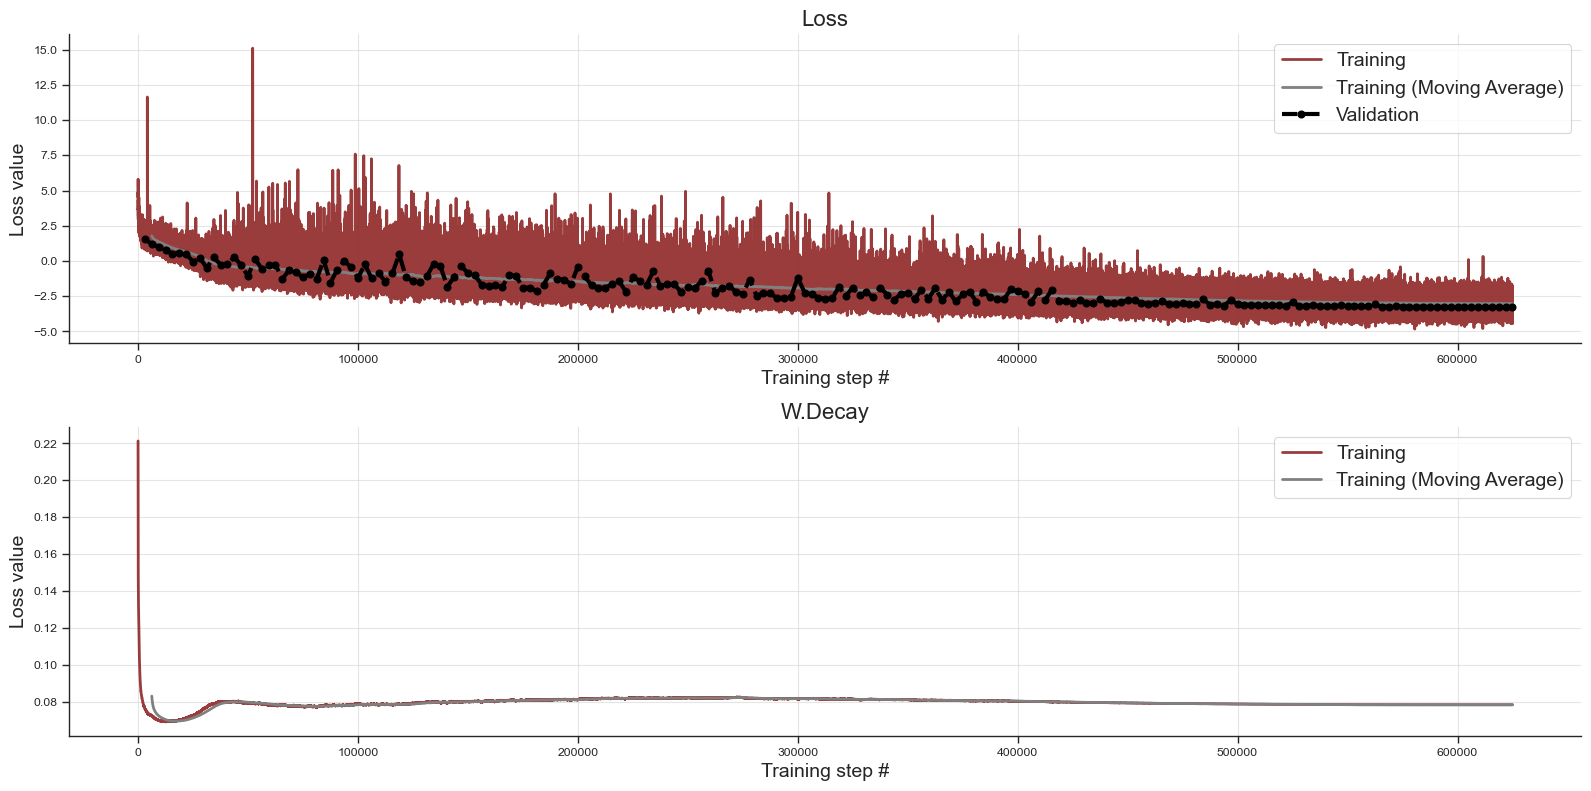

In [16]:
f = diag.plot_losses(history["train_losses"], history["val_losses"], moving_average=True)

In [17]:
# Generate some validation data
validation_sims = trainer.configurator(valid_data) 
prior_samples = validation_sims["parameters"] * prior_stds + prior_means
# Generate posterior draws for all simulations
post_samples = amortizer.sample(validation_sims, n_samples=1000)
post_samples = post_samples * prior_stds + prior_means

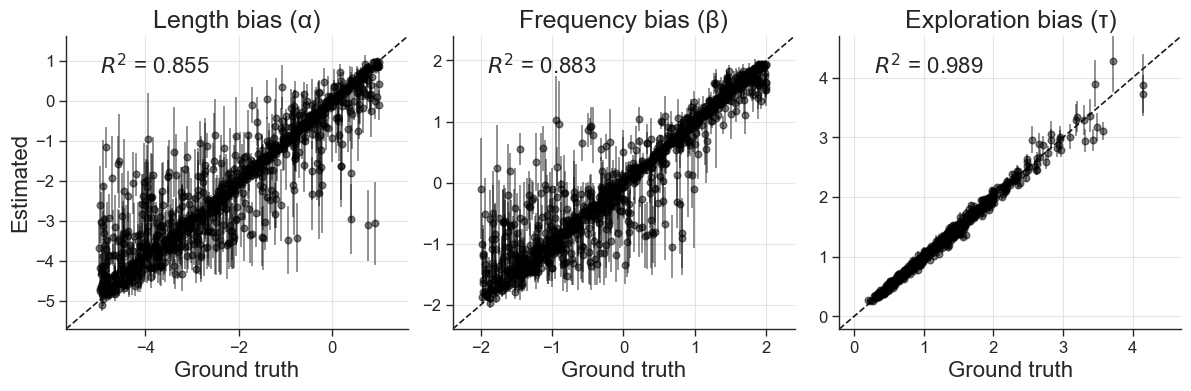

In [18]:
fig = diag.plot_recovery(post_samples[:1000], prior_samples[:1000], 
                         add_corr=False,
                         param_names=['Length bias (α)', 
                                      'Frequency bias (β)', 
                                      'Exploration bias (τ)'],
                         color='black')
plt.savefig("figures/Figure_s2.pdf", dpi=300,
            bbox_inches='tight')

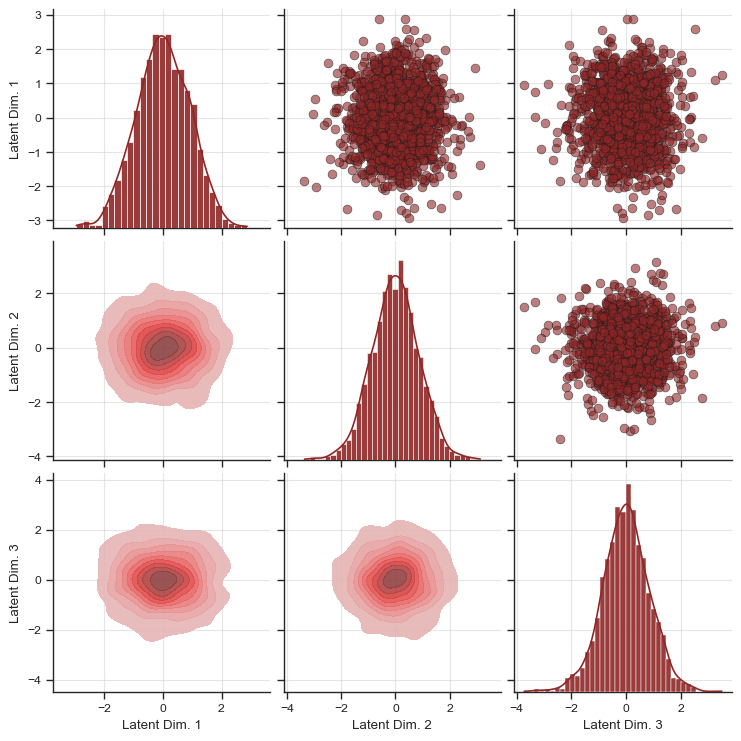

In [19]:
f = trainer.diagnose_latent2d()

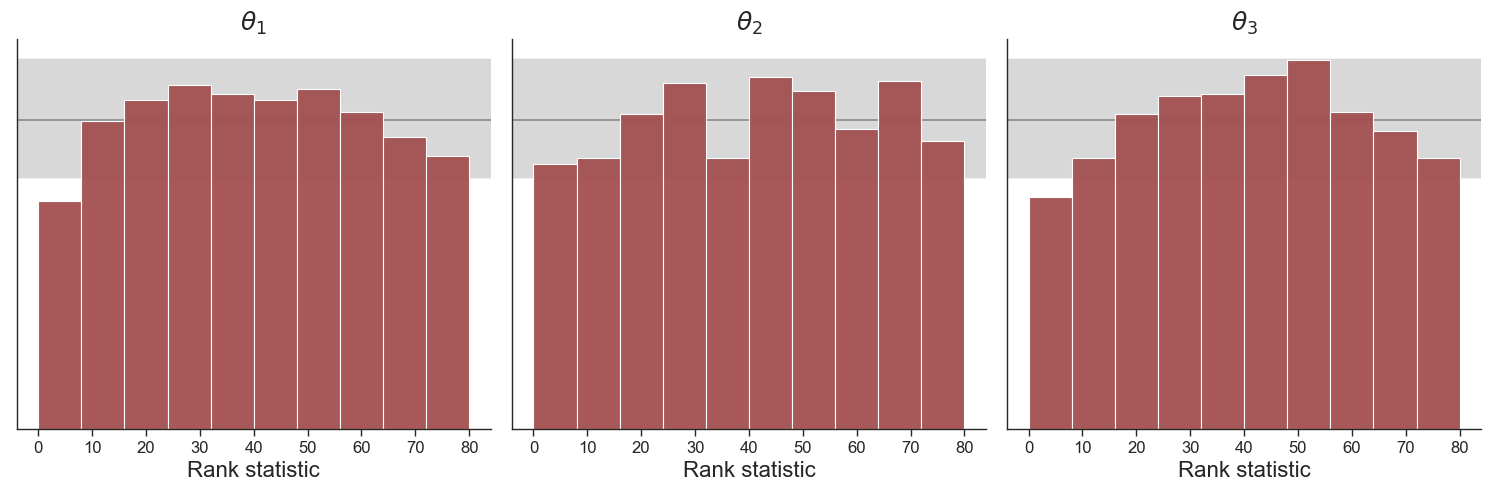

In [20]:
f = trainer.diagnose_sbc_histograms()

<!-- ### 4. Posterior estimation -->

In [21]:
true_likes = pickle.load(open("data/true_likes.pkl", "rb"))
true_likes_length = pickle.load(open("data/true_len_likes.pkl", "rb"))

In [22]:
# combine the two fake datas while binning each 
fake_data = np.concatenate([binning(true_likes), 
                            binning([x * y for x, y in true_likes_length])])

In [23]:
obs_data = np.log1p(fake_data)[np.newaxis, :, np.newaxis].astype(np.float32)
# obs_data = np.log1p(np.concatenate((true_bin, true_len_bin))[np.newaxis, :, np.newaxis].astype(np.float32))

In [24]:
# Obtain 1000 posterior draws given real data
post_samples_ = amortizer.sample({"summary_conditions": obs_data}, 10000)

# Undo standardization to get parameters on their original (unstandardized) scales
post_samples_ = prior_means + post_samples_ * prior_stds

In [25]:
post_samples_.mean(axis=0)

array([-0.6615055 , -0.06708019,  1.02540094])

In [26]:
post_samples_.std(axis=0)

array([0.10611358, 0.18009363, 0.03332729])

In [27]:
generate_latex_table(["Length bias (α)", "Frequency bias (β)", "Exploration bias (τ)"],
                     post_samples_)

'\\begin{tabular}{lrl}\n\\hline\n Parameter            &   Mean & HDI             \\\\\n\\hline\n Length bias (α)      & -0.662 & [-0.87  -0.464] \\\\\n Frequency bias (β)   & -0.067 & [-0.423  0.27 ] \\\\\n Exploration bias (τ) &  1.025 & [0.957 1.086]   \\\\\n\\hline\n\\end{tabular}'

In [28]:
pickle.dump(post_samples_, open("data/post_samples_final_2012.pkl", "wb"))

In [29]:
# Perform PCA
pca = PCA(n_components=2, whiten=True)
pca_result = pca.fit_transform(train_data['sim_data'])

true_hist = obs_data.reshape(1, -1)
pca_true = pca.transform(true_hist)

# Perform UMAP
umap_reducer = umap.UMAP(n_components=2)
umap_result = umap_reducer.fit_transform(train_data['sim_data'])
umap_true = umap_reducer.transform(true_hist)

In [30]:
posterior_predictive = run_model_parallel(np.random.choice(post_samples_[:, 0], 10), 
                                          np.random.choice(post_samples_[:, 1], 10), 
                                          np.random.choice(post_samples_[:, 2], 10), 10)

In [36]:
# apply binning to each entry in sim_data using map
obs_data = np.log1p(posterior_predictive).astype(np.float32)

In [38]:
# umap and pca for posterior predictive
umap_posterior = umap_reducer.transform(posterior_predictive)
pca_posterior = pca.transform(posterior_predictive)

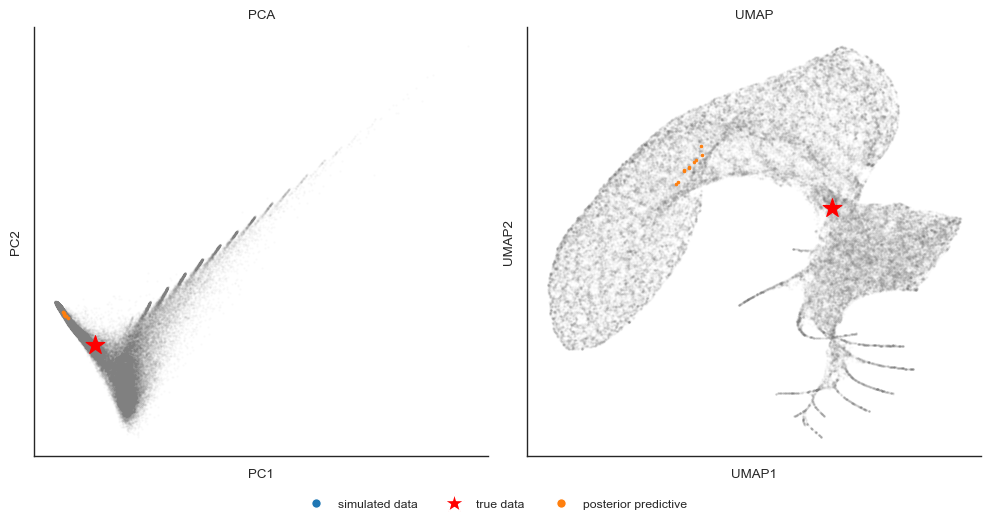

In [40]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# PCA Plot
ax1.scatter(pca_result[:, 0], pca_result[:, 1],
            s=1, color='grey',
            alpha=0.025, label='simulated data')
ax1.scatter(pca_true[:, 0], pca_true[:, 1], s=200, 
            marker='*', label='true data', color='red')
ax1.scatter(pca_posterior[:, 0], pca_posterior[:, 1], 
            s=3, alpha=1, label='posterior predictive', 
            color='tab:orange')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
# ax1.legend(frameon=False)
ax1.set_title('PCA')
sns.despine(ax=ax1)

# Remove ticks for PCA plot
ax1.set_xticks([])
ax1.set_yticks([])

# UMAP Plot
ax2.scatter(umap_result[:, 0],
            umap_result[:, 1], 
            color='grey', 
            s=1, alpha=0.025)
ax2.scatter(umap_true[:, 0], 
            umap_true[:, 1], s=200, 
            marker='*', color='red')
ax2.scatter(umap_posterior[:, 0], 
            umap_posterior[:, 1], s=3, alpha=1, color='tab:orange')
ax2.set_xlabel('UMAP1')
ax2.set_ylabel('UMAP2')
ax2.set_title('UMAP')
sns.despine(ax=ax2)

# Custom legend handles to control marker size
legend_elements = [
    Line2D([0], [0], marker='o', color='w', 
           label='simulated data', markersize=7, 
           markerfacecolor='tab:blue'),
    Line2D([0], [0], marker='*', color='w', 
           label='true data', markersize=15, 
           markerfacecolor='red'),
    Line2D([0], [0], marker='o', color='w', label='posterior predictive', 
           markersize=7, markerfacecolor='tab:orange')
]

# One single legend for both plots at the bottom
fig.legend(handles=legend_elements, loc='lower center', ncol=3, frameon=False, markerscale=1,
           bbox_to_anchor=(0.5, -0.05))

# Remove ticks for UMAP plot
ax2.set_xticks([])
ax2.set_yticks([])

# set rasterized to True to avoid large file sizes in each axis
ax1.set_rasterized(True)
ax2.set_rasterized(True)

plt.tight_layout()

plt.savefig('figures/pca_umap.pdf', dpi=300,
            bbox_inches='tight')
plt.show()